# 1. Instalacja oraz konfiguracja podstawowych paczek

In [1]:
!pip install tensorflow opencv-python matplotlib scikit-learn seaborn pandas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.6.2
charset-normalizer           3.3.2
comm                         0.2.2
contourpy                    1.2.1
customtkinter                5.2.2
cycler                       0.12.1
darkdetect                   0.8.0
debugpy                      1.8.1
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.53.0
gast                         0.5.4
google-pasta                 0.2.0
grpcio                       1.64.1
h5py                         3.11.0
idna                         3.7
ipykernel                    6.29.4
ipython                      8.25.0
jedi                         0.19.1
joblib                       1.4.2
jupyter_client               8.6.2
jupyter_core                 5.7.2
ke

In [3]:
import tensorflow as tf
import os

2024-06-06 21:29:39.994954: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-06 21:29:39.995181: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 21:29:39.997603: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 21:29:40.026289: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 21:29:40.521146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [4]:
# Poniższy kod zapobiega  przydzielaniu przez tensorflow całości pamięci GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Weryfikacja, kontrola oraz usunięcie z badania uszkodzonych, wadliwych zdjęć

In [6]:
import cv2
import imghdr

/tmp/ipykernel_23114/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'glass'

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) #sprawdzam czy mogę załadować zdjęcie do biblioteki opencv
            tip = imghdr.what(image_path) #sprwadzam czy rozsrzeszenie zdjęcia pokrywa się z akceptowalnymi rozszerzeniami
            if tip not in image_exts:
                print('Zdjęcie posiada nieobsługiwane rozszerzenie {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Wystąpił problem ze zdjęciem {}'.format(image_path))

# 3. Ładowanie danych

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('screws') #wywołanie zwróci zestaw danych z wskazanego katalogu, ujednolici, zmniejszy zdjęcia

Found 242 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator() #konwersja elementów zestawów danych na iterator, pozwoli nam uzyskać dostęp do poszczególnych danych

In [13]:
batch = data_iterator.next() #dostęp do zestawu danych, pobranie pierwszej iteracji

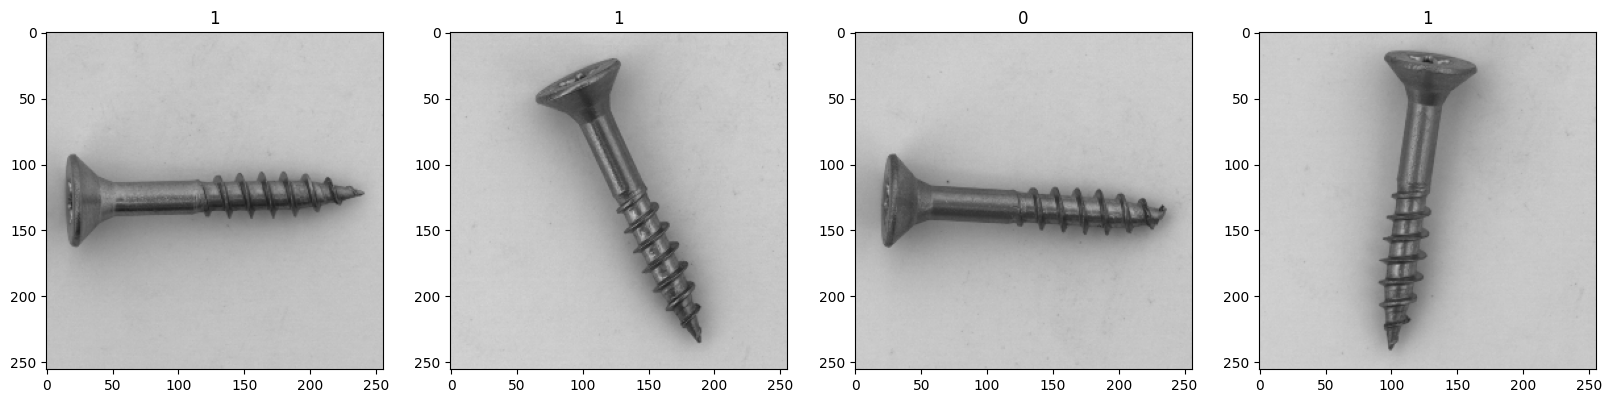

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Wstępne przetwarzanie danych

In [15]:
# przeskalowanie danych, w celu optymalizacji
data = data.map(lambda x,y: (x/255, y)) # funkcja .map umożliwia operacje na całym zestawie danych
data.as_numpy_iterator().next()

(array([[[[0.81960785, 0.81960785, 0.81960785],
          [0.8254902 , 0.8254902 , 0.8254902 ],
          [0.8245098 , 0.8245098 , 0.8245098 ],
          ...,
          [0.845098  , 0.845098  , 0.845098  ],
          [0.83137256, 0.83137256, 0.83137256],
          [0.8333333 , 0.8333333 , 0.8333333 ]],
 
         [[0.827451  , 0.827451  , 0.827451  ],
          [0.827451  , 0.827451  , 0.827451  ],
          [0.81078434, 0.81078434, 0.81078434],
          ...,
          [0.82941175, 0.82941175, 0.82941175],
          [0.8303922 , 0.8303922 , 0.8303922 ],
          [0.84313726, 0.84313726, 0.84313726]],
 
         [[0.82254905, 0.82254905, 0.82254905],
          [0.8215686 , 0.8215686 , 0.8215686 ],
          [0.8137255 , 0.8137255 , 0.8137255 ],
          ...,
          [0.8264706 , 0.8264706 , 0.8264706 ],
          [0.8352941 , 0.8352941 , 0.8352941 ],
          [0.82941175, 0.82941175, 0.82941175]],
 
         ...,
 
         [[0.81960785, 0.81960785, 0.81960785],
          [0.83235

In [16]:
train_size = int(len(data)*.7) # część zestawu danych, która będzie odpowiedzalna za trenowanie modelu
val_size = int(len(data)*.2)+1 # część zestwu danych odpowiedzialna za walidacje
test_size = int(len(data)*.1)+1 # część zestawu danych odpowiedzialna za końcowe testy

In [17]:
train_size

5

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Budowa modelu głębokiego uczenia

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/karol/Developments/Image-Classification/imageclassification/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 6. Trenowanie

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=70, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 0.5242 - loss: 1.0647 - val_accuracy: 0.4688 - val_loss: 0.7526
Epoch 2/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.5417 - loss: 0.7196 - val_accuracy: 0.5312 - val_loss: 0.6907
Epoch 3/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.3894 - loss: 0.7134 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 4/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.4990 - loss: 0.6945 - val_accuracy: 0.4375 - val_loss: 0.6940
Epoch 5/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 478ms/step - accuracy: 0.4990 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 6/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - accuracy: 0.4705 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 7/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.4569 - loss: 0.7033 - val_accuracy: 0.4844 - val_loss: 0.6931
Epoch 8/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step - accuracy: 0.4747 - loss: 0.6931 - val_accuracy: 0.5312 - val_loss:

# 7. Badanie wydajności, wykaz strat

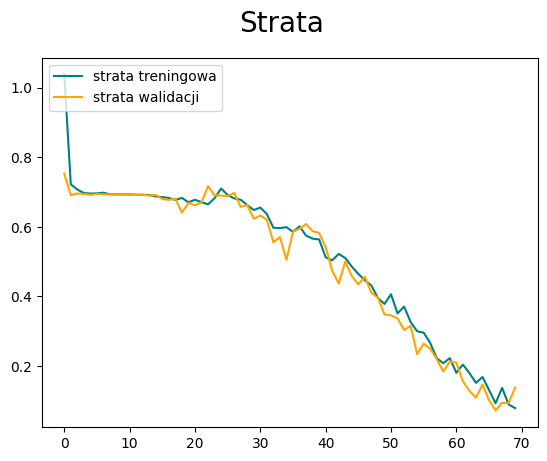

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='strata treningowa')
plt.plot(hist.history['val_loss'], color='orange', label='strata walidacji')
fig.suptitle('Strata', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Badanie wydajności, wykaz dokładności

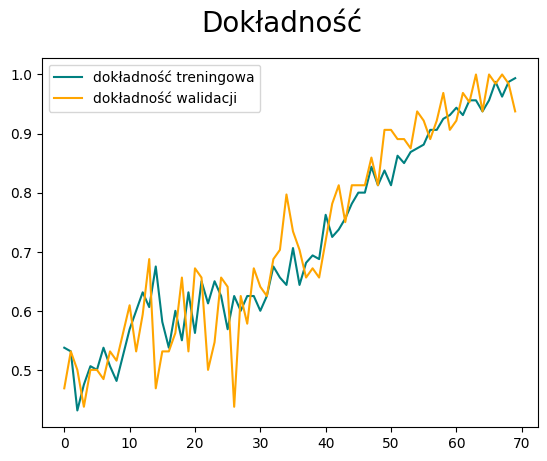

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='dokładność treningowa')
plt.plot(hist.history['val_accuracy'], color='orange', label='dokładność walidacji')
fig.suptitle('Dokładność', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Test

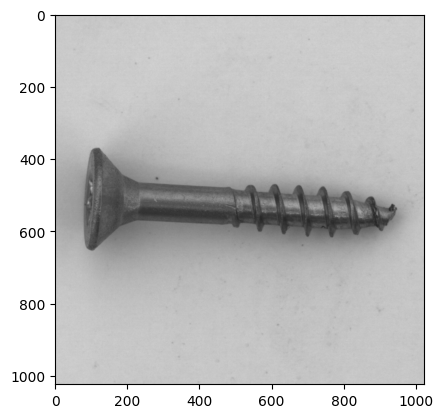

In [29]:
img = cv2.imread('testing/screws/failure_2.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

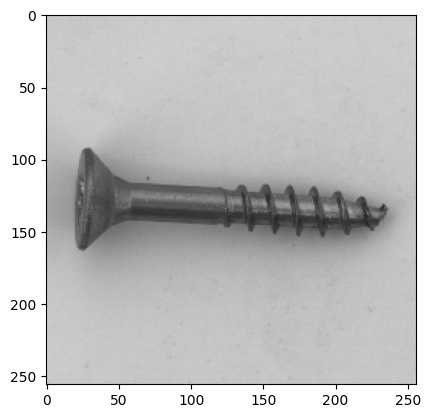

In [30]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
yhat  = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [32]:
yhat

array([[0.00446725]], dtype=float32)

In [33]:
if yhat > 0.5:
    print(f'Wskazany obraz został sklasyfikowany jako część prawidłowa')
else:
    print(f'Wskazany obraz został sklasyfikowany jako część uszkodzona')

Wskazany obraz został sklasyfikowany jako część uszkodzona


# 10. Zapis modelu

In [34]:
from tensorflow.keras.models import load_model

In [35]:
model.save(os.path.join('models', 'screws.h5'))